Import modules needed

In [142]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import nan as NA
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

Import data set file

In [143]:
data = pd.read_csv('HeartDisease.csv')

# Data Describtion

Summary of our dataset

In [144]:
data.describe()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,457.000000,457.000000,457.000000,457.000000,424.000000,431.000000,403.000000,455.000000,424.000000,424.000000,421.000000,457.000000
mean,229.000000,50.962801,0.796499,3.155361,131.488208,200.048724,0.138958,0.356044,134.910377,0.358491,0.622090,0.459519
std,132.068795,9.219588,0.403043,0.943548,18.829454,113.463794,0.346332,0.590529,24.251177,0.480124,0.922115,0.498905
min,1.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-2.600000,0.000000
25%,115.000000,45.000000,1.000000,2.000000,120.000000,171.000000,0.000000,0.000000,118.000000,0.000000,0.000000,0.000000
50%,229.000000,52.000000,1.000000,3.000000,130.000000,220.000000,0.000000,0.000000,135.000000,0.000000,0.000000,0.000000
75%,343.000000,57.000000,1.000000,4.000000,140.000000,269.500000,0.000000,1.000000,150.000000,1.000000,1.000000,1.000000
max,457.000000,75.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


Check for the first 5 rows

In [145]:
data.head()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0,Hungary
1,2,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0,Hungary
2,3,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0,Hungary
3,4,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0,Hungary
4,5,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0,Hungary


Size of out dataset

In [146]:
data.shape

(457, 13)

Detect outliers

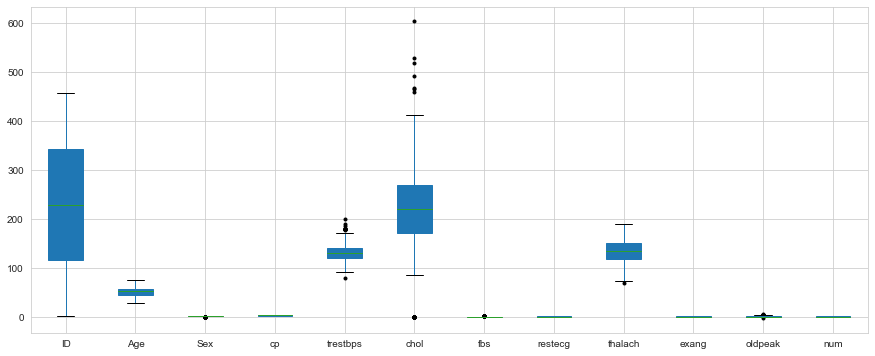

In [147]:
plt.subplots(figsize=(15,6))
data.boxplot(patch_artist=True, sym="k.")

show a concise summary of the dataset

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        457 non-null    int64  
 1   Age       457 non-null    int64  
 2   Sex       457 non-null    int64  
 3   cp        457 non-null    int64  
 4   trestbps  424 non-null    float64
 5   chol      431 non-null    float64
 6   fbs       403 non-null    float64
 7   restecg   455 non-null    float64
 8   thalach   424 non-null    float64
 9   exang     424 non-null    float64
 10  oldpeak   421 non-null    float64
 11  num       457 non-null    int64  
 12  Place     457 non-null    object 
dtypes: float64(7), int64(5), object(1)
memory usage: 46.5+ KB


Get the number of unique values for each variable.

In [149]:
data.nunique(axis = 0)

ID          457
Age          46
Sex           2
cp            4
trestbps     46
chol        170
fbs           2
restecg       3
thalach      93
exang         2
oldpeak      32
num           2
Place         3
dtype: int64

Since id column is redundant and unuseful for data analysys, our team decided to drop it.

In [150]:
data.drop('ID', axis = 1, inplace = True)
data

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0,Hungary
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0,Hungary
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0,Hungary
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0,Hungary
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0,Hungary
...,...,...,...,...,...,...,...,...,...,...,...,...
452,62,1,4,158.0,170.0,0.0,1.0,138.0,1.0,0.0,1,VA
453,54,0,4,127.0,333.0,1.0,1.0,154.0,0.0,0.0,1,VA
454,62,1,1,NaN,139.0,0.0,1.0,NaN,NaN,NaN,0,VA
455,58,1,4,NaN,385.0,1.0,2.0,NaN,NaN,NaN,0,VA


## Start with cleaning null data

Print out all the column names

In [151]:
print(data.columns.values)

['Age' 'Sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'num' 'Place']


As we can see, the columns names are not all start with capital letter, which is inconsistent
Hense, we need to fix it.

In [152]:
data.columns = map(str.capitalize, data.columns)
print(data.columns.values) 

['Age' 'Sex' 'Cp' 'Trestbps' 'Chol' 'Fbs' 'Restecg' 'Thalach' 'Exang'
 'Oldpeak' 'Num' 'Place']


Find out the missing values for each column

In [153]:
data.isnull().sum()

Age          0
Sex          0
Cp           0
Trestbps    33
Chol        26
Fbs         54
Restecg      2
Thalach     33
Exang       33
Oldpeak     36
Num          0
Place        0
dtype: int64

Check if any error data for each column

In [154]:
print("Errors:")
print('Age:', len(data[(data['Age'] < 18) | (data['Age'] > 100)]))
print('Chol:', len(data[(data['Chol'] < 1)]))
print('Trestbps:', len(data[(data['Trestbps'] < 1)]))
print('Fbs:', len(data[(data['Fbs'] < 0)| (data['Fbs'] > 1)]))
print('Restecg:', len(data[(data['Restecg'] < 0)| (data['Restecg'] > 2)]))
print('Exang:', len(data[(data['Exang'] < 0)| (data['Exang'] > 1)]))
print('Oldpeak:', len(data[data['Oldpeak'].astype(str).str.isnumeric()]))
print('Num:', len(data[(data['Num'] < 0)| (data['Num'] > 1)]))
# Check if any misspelling in Place column
errors=[]
for i, v in enumerate(data['Place']):
    if (v[0] == "H") and (v != "Hungary"):
        errors.append(data.at[i,'Place'])
        data.at[i,'Place'] = "Hungary"

    if (v[0] == "S") and (v != "Switzerland"):
        errors.append(data.at[i,'Place'])
        data.at[i,'Place'] = "Switzerland"

    if (v[0] == "V") and (v != "VA"):
        errors.append(data.at[i,'Place'])
        data.at[i,'Place'] = "VA"

print('Place', len(errors))

Errors:
Age: 0
Chol: 82
Trestbps: 0
Fbs: 0
Restecg: 0
Exang: 0
Oldpeak: 0
Num: 0
Place 0


Check what kind of error in Chol

In [155]:
data.loc[data['Chol'] <1, ['Chol']]

,Chol
294,0.0
295,0.0
296,0.0
297,0.0
298,0.0
...,...
386,0.0
401,0.0
402,0.0
404,0.0


Except for null value, we also found out Chol(Cholesterol) column contains 82 of zero value from above rule.
Those zero values are invalid.

In [156]:
print(data['Chol'].isin([0]).sum())

82


Transform zero value into null

In [157]:
data.loc[data['Chol'] ==0 , 'Chol'] = np.nan

drop columns with missing values more than 10%

In [158]:
threshold = (1-0.1)*len(data)

data.dropna(thresh = threshold,axis=1,inplace=True)
data

,Age,Sex,Cp,Trestbps,Restecg,Thalach,Exang,Oldpeak,Num,Place
0,28,1,2,130.0,2.0,185.0,0.0,0.0,0,Hungary
1,29,1,2,120.0,0.0,160.0,0.0,0.0,0,Hungary
2,29,1,2,140.0,0.0,170.0,0.0,0.0,0,Hungary
3,30,0,1,170.0,1.0,170.0,0.0,0.0,0,Hungary
4,31,0,2,100.0,1.0,150.0,0.0,0.0,0,Hungary
...,...,...,...,...,...,...,...,...,...,...
452,62,1,4,158.0,1.0,138.0,1.0,0.0,1,VA
453,54,0,4,127.0,1.0,154.0,0.0,0.0,1,VA
454,62,1,1,NaN,1.0,NaN,NaN,NaN,0,VA
455,58,1,4,NaN,2.0,NaN,NaN,NaN,0,VA


Drop rows with missing values more than 20%

In [159]:
threshold = (1-0.2)*len(data.columns)

data.dropna(thresh = threshold,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 456
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       424 non-null    int64  
 1   Sex       424 non-null    int64  
 2   Cp        424 non-null    int64  
 3   Trestbps  424 non-null    float64
 4   Restecg   422 non-null    float64
 5   Thalach   424 non-null    float64
 6   Exang     424 non-null    float64
 7   Oldpeak   420 non-null    float64
 8   Num       424 non-null    int64  
 9   Place     424 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 36.4+ KB


# Replace missing values


Check the current null value in all columns

In [160]:
data.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Restecg     2
Thalach     0
Exang       0
Oldpeak     4
Num         0
Place       0
dtype: int64

For numerical null value, we can use median to replace it

In [161]:
data['Oldpeak'].fillna(data['Oldpeak'].median(), inplace = True)

For Catorical null vaule, we can use mode to replace it

In [162]:
data['Restecg'].fillna(str(data['Restecg'].mode().values[0]), inplace=True)

Check the current null value in all columns

In [163]:
data.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Num         0
Place       0
dtype: int64

# Remove outlier

Identify outliers (according to the boxplot above) using z scores 

In [164]:
mean_of_trestbps = int(data['Trestbps'].mean())

data.loc[np.abs(stats.zscore(data['Trestbps'])) > 3, 'Trestbps'] = np.nan
data.fillna(mean_of_trestbps,inplace=True)

Plot another box plot to check if the outliers are removed

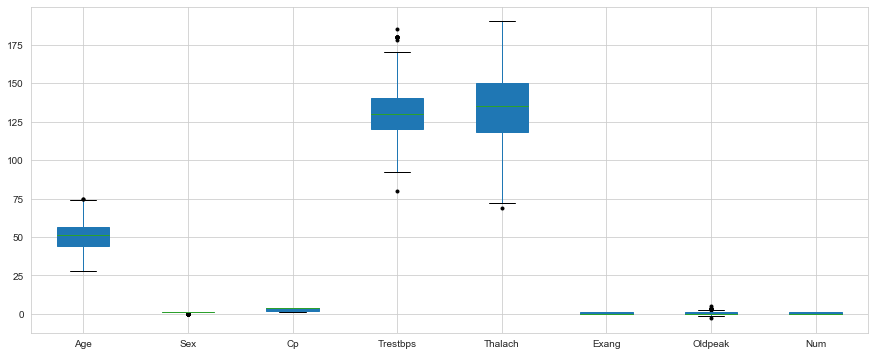

In [165]:
plt.subplots(figsize=(15,6))
data.boxplot(patch_artist=True, sym="k.")

# Machine Learning Section:

In [166]:
import graphviz
#conda install python-graphviz

import os
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,export_graphviz
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Dataset that is going to use for this Machine Learning task

In [167]:
data

,Age,Sex,Cp,Trestbps,Restecg,Thalach,Exang,Oldpeak,Num,Place
0,28,1,2,130.0,2,185.0,0.0,0.0,0,Hungary
1,29,1,2,120.0,0,160.0,0.0,0.0,0,Hungary
2,29,1,2,140.0,0,170.0,0.0,0.0,0,Hungary
3,30,0,1,170.0,1,170.0,0.0,0.0,0,Hungary
4,31,0,2,100.0,1,150.0,0.0,0.0,0,Hungary
...,...,...,...,...,...,...,...,...,...,...
450,68,1,3,134.0,0,151.0,1.0,0.0,0,VA
451,51,0,4,114.0,2,96.0,0.0,1.0,0,VA
452,62,1,4,158.0,1,138.0,1.0,0.0,1,VA
453,54,0,4,127.0,1,154.0,0.0,0.0,1,VA


## 1.0 Feature Selection

In [168]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

Find the best features

In [169]:
# Divide the data
X = data.drop(['Num', 'Place'],axis=1)
y = data['Num']


# Choose the scope of best k
select_best_K = SelectKBest(mutual_info_classif, k = 7)
X_new = select_best_K.fit_transform(X, y)

# Create two data sets to represent the score
datascores = pd.DataFrame(select_best_K.scores_)
datacolumns = pd.DataFrame(data.columns)


In [170]:
X_new.shape

(424, 7)

In [171]:
# Output the score of each features
featureScores = pd.concat([datacolumns,datascores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 7 best features

      Specs     Score
2        Cp  0.161767
7   Oldpeak  0.120664
6     Exang  0.110702
5   Thalach  0.045202
0       Age  0.036636
1       Sex  0.035663
3  Trestbps  0.034826


In [172]:
# Set the feature column with best K
BestK = ['Age', "Sex", "Cp", "Oldpeak", "Exang", "Trestbps", "Thalach"]

##### Data Splitting

In [173]:
# Split the dataset into 30% for test data, and 70% for train data.
# Use the best features from our dataset

X = data[BestK]
y = data['Num']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

##### Classifier analysing with Pipeline

In [174]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline

# set up classifiers
classifiers = {'LogisticRegression': LogisticRegression(max_iter=500), 'SVC':SVC(), 'DecisionTreeClassifier': DecisionTreeClassifier(),'KNeighborsClassifier':KNeighborsClassifier(), 'GaussianNB': GaussianNB()}

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier',  classifiers[classifier])])
    pipe.fit(Xtrain, ytrain)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(Xtest, ytest)*100)))

The accuracy score of LogisticRegression is: 74.22%
The accuracy score of SVC is: 67.97%
The accuracy score of DecisionTreeClassifier is: 72.66%
The accuracy score of KNeighborsClassifier is: 63.28%
The accuracy score of GaussianNB is: 82.03%


##### Classifier analysing

In [175]:
accuracies = {}

##### 2.1 Decision tree

In [176]:
# fit a classification tree with max_depth = 5 (To try with 5 first)
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)

# Fit our training data
treeclf.fit(Xtrain, ytrain)

# output the accuracy of train and test
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))  #this is only the training accuracy
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))

Training accuracy: 0.8581081081081081
Testing accuracy : 0.78125


##### 2.2 Use Cross Validation to get average accuracy

In [177]:
# use crossvalidation to get avg accuracy

from sklearn.model_selection import cross_val_score
scores = cross_val_score(treeclf, Xtrain, ytrain, cv=10, scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: {}".format(np.mean(scores)))
accuracies['Decision Tree'] = np.mean(scores)

Accuracy for each fold: [0.56666667 0.76666667 0.8        0.7        0.63333333 0.66666667
 0.79310345 0.72413793 0.79310345 0.5862069 ]
Mean Accuracy: 0.7029885057471265


##### 2.3 Graph that shows accuracy per decision tree depth on training data to find the best max depth

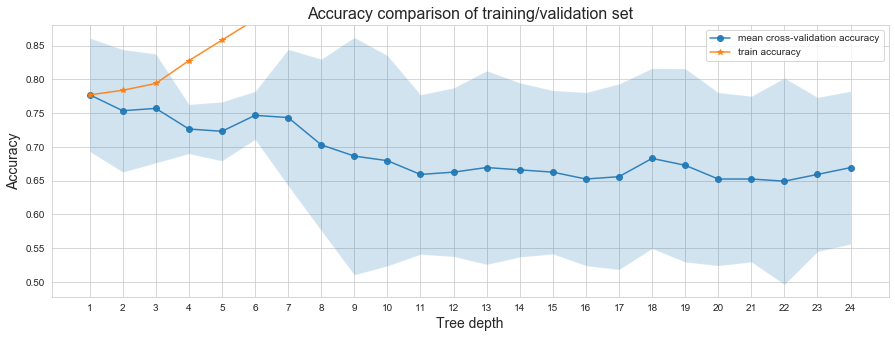

In [178]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(Xtrain, ytrain, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy comparison of training/validation set')


    
 


In [179]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth {} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth 1 tree achieves the best mean cross-validation accuracy 77.72316 +/- 4.20058% on training dataset


In [180]:
treeclf = DecisionTreeClassifier(max_depth= 1, random_state=1)

# Fit our training data
treeclf.fit(Xtrain, ytrain)
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))  # This is not important
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))    # this is the performance of our method

Training accuracy: 0.777027027027027
Testing accuracy : 0.7109375


##### 2.4 Export the decision tree graph

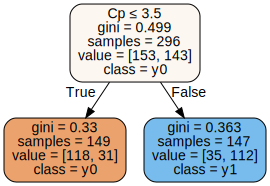

In [181]:
dot_data = tree.export_graphviz(treeclf, out_file=None, 
                     feature_names=BestK,  
                     class_names=True,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


##### 3. Logistic Regression

In [182]:
#Set model
lr = LogisticRegression(max_iter=500)

#fit svm model to train data
lr.fit(Xtrain, ytrain)

#Predict the output of the test set.
ypred = lr.predict(Xtest)


print("The accuracy score for Logistic Regression is:", accuracy_score(ytest, ypred))

print('Precision of predictions is', precision_score(ytest,ypred))

print('Recall of predictions is', recall_score(ytest,ypred))

print('F1-score of predictions is ',f1_score(ytest,ypred))

The accuracy score for Logistic Regression is: 0.7421875
Precision of predictions is 0.6567164179104478
Recall of predictions is 0.8148148148148148
F1-score of predictions is  0.7272727272727273


Cross Validation

In [183]:
Scores = cross_val_score(lr, Xtrain, ytrain, cv=10)
print("Accuracy for each fold: {}".format(Scores))
print("Mean Accuracy: {}".format(np.mean(Scores)))
accuracies['Logistic Regression'] = np.mean(Scores)

Accuracy for each fold: [0.63333333 0.8        0.73333333 0.8        0.63333333 0.8
 0.79310345 0.82758621 0.86206897 0.65517241]
Mean Accuracy: 0.7537931034482759


Confusion matrix

Text(0.5, 1.1, 'Confusion matrix of Logistic Regression')

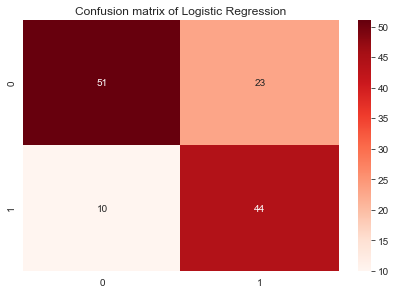

In [184]:
sns.heatmap(pd.DataFrame(confusion_matrix(ytest, ypred)), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix of Logistic Regression', y=1.1)

classification report

In [185]:
from sklearn.metrics import classification_report
print (classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        74
           1       0.66      0.81      0.73        54

    accuracy                           0.74       128
   macro avg       0.75      0.75      0.74       128
weighted avg       0.76      0.74      0.74       128



##### 4.1 SVM (kernel=’linear’, C=1)

In [186]:
#Set model
svm = SVC(kernel='linear', C=1)

#fit svm model to train data
svm.fit(Xtrain, ytrain)

#Predict the output of the test set.
ypred = svm.predict(Xtest)


print("The accuracy score for SVM is:", accuracy_score(ytest, ypred))

print('Precision of predictions is', precision_score(ytest,ypred))

print('Recall of predictions is', recall_score(ytest,ypred))

print('F1-score of predictions is ',f1_score(ytest,ypred))

The accuracy score for SVM is: 0.75
Precision of predictions is 0.6571428571428571
Recall of predictions is 0.8518518518518519
F1-score of predictions is  0.7419354838709677


Cross Validation

In [187]:
Scores = cross_val_score(svm, Xtrain, ytrain, cv=10)
print("Accuracy for each fold: {}".format(Scores))
print("Mean Accuracy: {}".format(np.mean(Scores)))
accuracies['SVM'] = np.mean(Scores)

Accuracy for each fold: [0.63333333 0.8        0.7        0.8        0.66666667 0.8
 0.82758621 0.82758621 0.82758621 0.65517241]
Mean Accuracy: 0.7537931034482759


Confusion matrix

Text(0.5, 1.1, 'Confusion matrix of SVM (kernel=’linear’, C=1)')

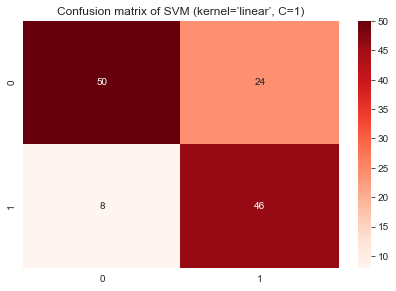

In [188]:
sns.heatmap(pd.DataFrame(confusion_matrix(ytest, ypred)), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix of SVM (kernel=’linear’, C=1)', y=1.1)

classification report

In [189]:
from sklearn.metrics import classification_report
print (classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        74
           1       0.66      0.85      0.74        54

    accuracy                           0.75       128
   macro avg       0.76      0.76      0.75       128
weighted avg       0.78      0.75      0.75       128



##### 4.2 SVC(kernel='rbf', C=1, gamma = 'auto'),

In [190]:
#Set model
svm = SVC(kernel='rbf', C=1, gamma = 'auto')

#fit svm model to train data
svm.fit(Xtrain, ytrain)

#Predict the output of the test set.
ypred = svm.predict(Xtest)


print("The accuracy score for SVM is:", accuracy_score(ytest, ypred))

print('Precision of predictions is', precision_score(ytest,ypred))

print('Recall of predictions is', recall_score(ytest,ypred))

print('F1-score of predictions is ',f1_score(ytest,ypred))

The accuracy score for SVM is: 0.5859375
Precision of predictions is 0.5185185185185185
Recall of predictions is 0.25925925925925924
F1-score of predictions is  0.345679012345679


Cross Validation

In [191]:
Scores = cross_val_score(svm, Xtrain, ytrain, cv=10)
print("Accuracy for each fold: {}".format(Scores))
print("Mean Accuracy: {}".format(np.mean(Scores)))
accuracies['SVC'] = np.mean(Scores)

Accuracy for each fold: [0.53333333 0.56666667 0.53333333 0.53333333 0.56666667 0.5
 0.62068966 0.68965517 0.62068966 0.51724138]
Mean Accuracy: 0.56816091954023


Confusion matrix

Text(0.5, 1.1, "Confusion matrix of SVC(kernel='rbf', C=1, gamma = 'auto')")

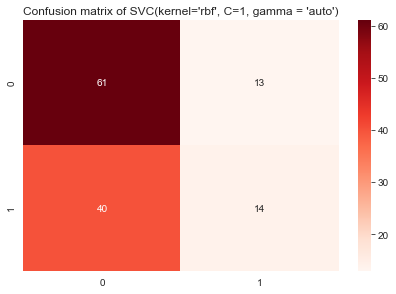

In [192]:
sns.heatmap(pd.DataFrame(confusion_matrix(ytest, ypred)), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix of SVC(kernel=\'rbf\', C=1, gamma = \'auto\')', y=1.1)

classification report

In [193]:
from sklearn.metrics import classification_report
print (classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.60      0.82      0.70        74
           1       0.52      0.26      0.35        54

    accuracy                           0.59       128
   macro avg       0.56      0.54      0.52       128
weighted avg       0.57      0.59      0.55       128



##### 5. K Nearest Neighbour

In [194]:
#Set model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit svm model to train data
knn.fit(Xtrain, ytrain)

#Predict the output of the test set.
ypred = knn.predict(Xtest)


print("The accuracy score for KNN is:", accuracy_score(ytest, ypred))

print('Precision of predictions is', precision_score(ytest,ypred))

print('Recall of predictions is', recall_score(ytest,ypred))

print('F1-score of predictions is ',f1_score(ytest,ypred))

The accuracy score for KNN is: 0.6640625
Precision of predictions is 0.6486486486486487
Recall of predictions is 0.4444444444444444
F1-score of predictions is  0.5274725274725275


In [195]:
Scores = cross_val_score(knn, Xtrain, ytrain, cv=10)
print("Accuracy for each fold: {}".format(Scores))
print("Mean Accuracy: {}".format(np.mean(Scores)))
accuracies['K Nearest Neighbour'] = np.mean(Scores)

Accuracy for each fold: [0.5        0.56666667 0.7        0.5        0.5        0.5
 0.5862069  0.5862069  0.65517241 0.5862069 ]
Mean Accuracy: 0.5680459770114943


Confusion matrix

Text(0.5, 1.1, 'Confusion matrix of K Nearest Neighbour')

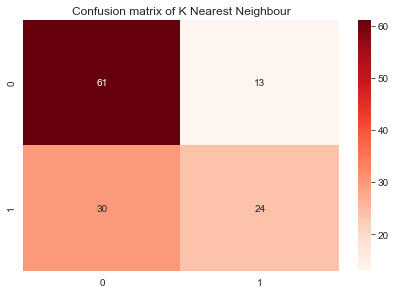

In [196]:
sns.heatmap(pd.DataFrame(confusion_matrix(ytest, ypred)), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix of K Nearest Neighbour', y=1.1)

classification report

In [197]:
from sklearn.metrics import classification_report
print (classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74        74
           1       0.65      0.44      0.53        54

    accuracy                           0.66       128
   macro avg       0.66      0.63      0.63       128
weighted avg       0.66      0.66      0.65       128



##### 5. GaussianNB

In [198]:
#Set model
gnp = GaussianNB()

#fit svm model to train data
gnp.fit(Xtrain, ytrain)

#Predict the output of the test set.
ypred = gnp.predict(Xtest)


print("The accuracy score for GaussianNB is:", accuracy_score(ytest, ypred))

print('Precision of predictions is', precision_score(ytest,ypred))

print('Recall of predictions is', recall_score(ytest,ypred))

print('F1-score of predictions is ',f1_score(ytest,ypred))

The accuracy score for GaussianNB is: 0.8203125
Precision of predictions is 0.7818181818181819
Recall of predictions is 0.7962962962962963
F1-score of predictions is  0.7889908256880734


In [199]:
Scores = cross_val_score(gnp, Xtrain, ytrain, cv=10)
print("Accuracy for each fold: {}".format(Scores))
print("Mean Accuracy: {}".format(np.mean(Scores)))
accuracies['GaussianNB'] = np.mean(Scores)

Accuracy for each fold: [0.63333333 0.8        0.8        0.76666667 0.63333333 0.76666667
 0.79310345 0.79310345 0.93103448 0.72413793]
Mean Accuracy: 0.7641379310344829


Confusion matrix

Text(0.5, 1.1, 'Confusion matrix of GaussianNB')

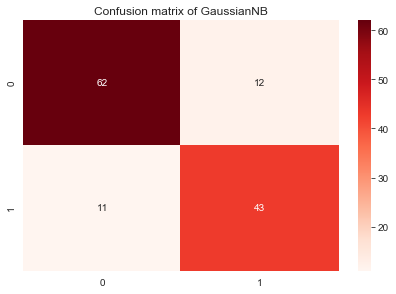

In [200]:
sns.heatmap(pd.DataFrame(confusion_matrix(ytest, ypred)), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix of GaussianNB', y=1.1)

classification reprot

In [201]:
from sklearn.metrics import classification_report
print (classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84        74
           1       0.78      0.80      0.79        54

    accuracy                           0.82       128
   macro avg       0.82      0.82      0.82       128
weighted avg       0.82      0.82      0.82       128



#### Applying model in real world

In [133]:
BestK

['Age', 'Sex', 'Cp', 'Oldpeak', 'Exang', 'Trestbps', 'Thalach']

In [ ]:
find out whether a person can get heart disease

In [138]:
from sklearn.preprocessing import MinMaxScaler

def heart_disease_predict():
    my_predictors = []
    features=['Age', 'Sex', 'Cp', 'Oldpeak', 'Exang', 'Trestbps', 'Thalach']
    
    #Ask for input
    
    Age = input("Patient's age (Age): >>> ") 
    my_predictors.append(Age)
    
    Sex = input("Patient's gender. male=0, female=1 (Sex): >>> ") 
    my_predictors.append(Sex)
    
    Cp = input("Patient's Chest pain type (Cp): >>> ") 
    my_predictors.append(Cp)
    
    Oldpeak = input("Patient's ST depression induced by exercise relative to rest. (Oldpeak)>>> ") 
    my_predictors.append(Oldpeak)
    
    Exang = input("Is patient's Exercise induced angina? (Exang): >>> ") 
    my_predictors.append(Exang)
    
    Trestbps = input("Patient's Resting blood pressure (Trestbps): >>> ") 
    my_predictors.append(Trestbps)
    
    Thalach = input("Patient's Maximum heart rate achieved (Thalach): >>> ")
    my_predictors.append(Thalach)


    
    my_data = dict(zip(features, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # Put scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    
    # Using GaussianNB
    my_y_pred = gnp.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
heart_disease_predict()

Patient's age (Age): >>> 25
Patient's gender. male=0, female=1 (Sex): >>> 1
Patient's Chest pain type (Cp): >>> 2
Patient's ST depression induced by exercise relative to rest. (Oldpeak)>>> 0
Is patient's Exercise induced angina? (Exang): >>> 1
Patient's Resting blood pressure (Trestbps): >>> 130
Patient's Maximum heart rate achieved (Thalach): >>> 160


Result:
The patient will not develop a Heart Disease.


# Conclusion

In [139]:
accuracies

{'Decision Tree': 0.7029885057471265,
 'Logistic Regression': 0.7537931034482759,
 'SVM': 0.7537931034482759,
 'SVC': 0.56816091954023,
 'K Nearest Neighbour': 0.5680459770114943,
 'GaussianNB': 0.7641379310344829}

display all accuracies in histograph

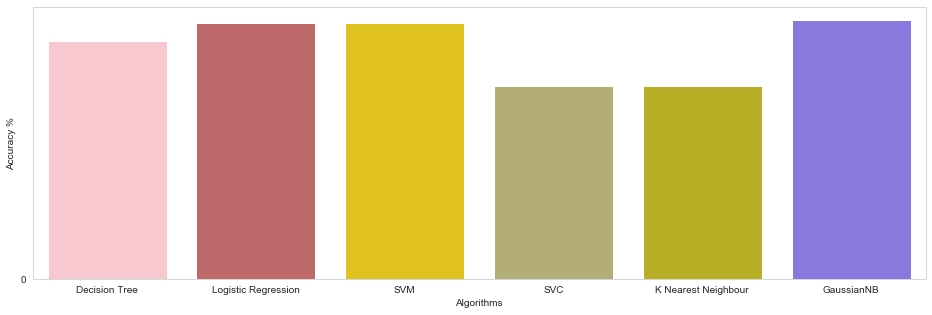

In [140]:
colors = ["#FFC0CB", "#CD5C5C", "#FFD700", "#BDB76B","#CFC60E","#7B68EE" ]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()